<a href="https://colab.research.google.com/github/bhargavi-max/Data-Science-Projects/blob/main/Image_Processing_Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhargaviguddati","key":"143e0097939d2bb89586204fde2babe2"}'}

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          22094        613  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1018         26  1.0              
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           2479         58  1.0              
darshanprabhu09/stock-prices-f

In [10]:
!kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:12<00:00, 21.2MB/s]
100% 218M/218M [00:12<00:00, 18.2MB/s]


In [11]:
!unzip cat-and-dog.zip 

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

# New Section

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

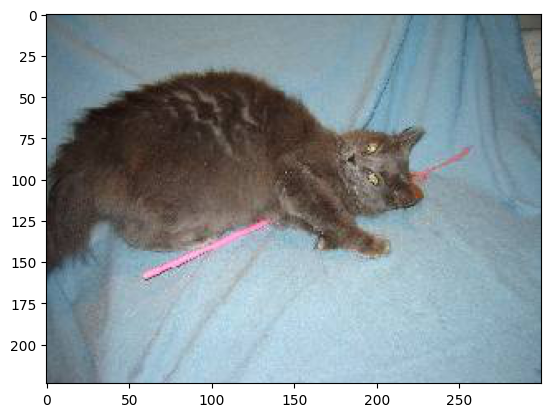

In [13]:
img = mpimg.imread('/content/test_set/test_set/cats/cat.4016.jpg')
imgplot=plt.imshow(img)
plt.show()

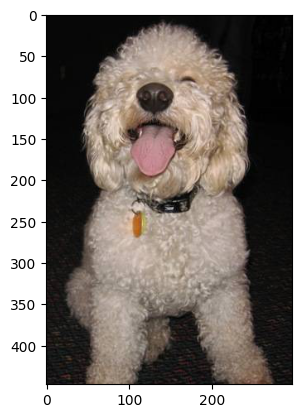

In [14]:
img = mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot=plt.imshow(img)
plt.show()

In [15]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [16]:
# initialize the parameters

img_width, img_height =150,150
train_data_dir =r"/content/training_set/training_set"
validation_data_dir =r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size =20


In [17]:
# Represent image data as 3D array

import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first':
  input_shape=(3, img_width, img_height)
else:
  input_shape=(img_width, img_height,3)


In [18]:
# Generate imgs to train model

train_datagen = ImageDataGenerator(rescale=1. /255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. /255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size,class_mode ='binary', classes=['cats', 'dogs'])

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size,class_mode ='binary')



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


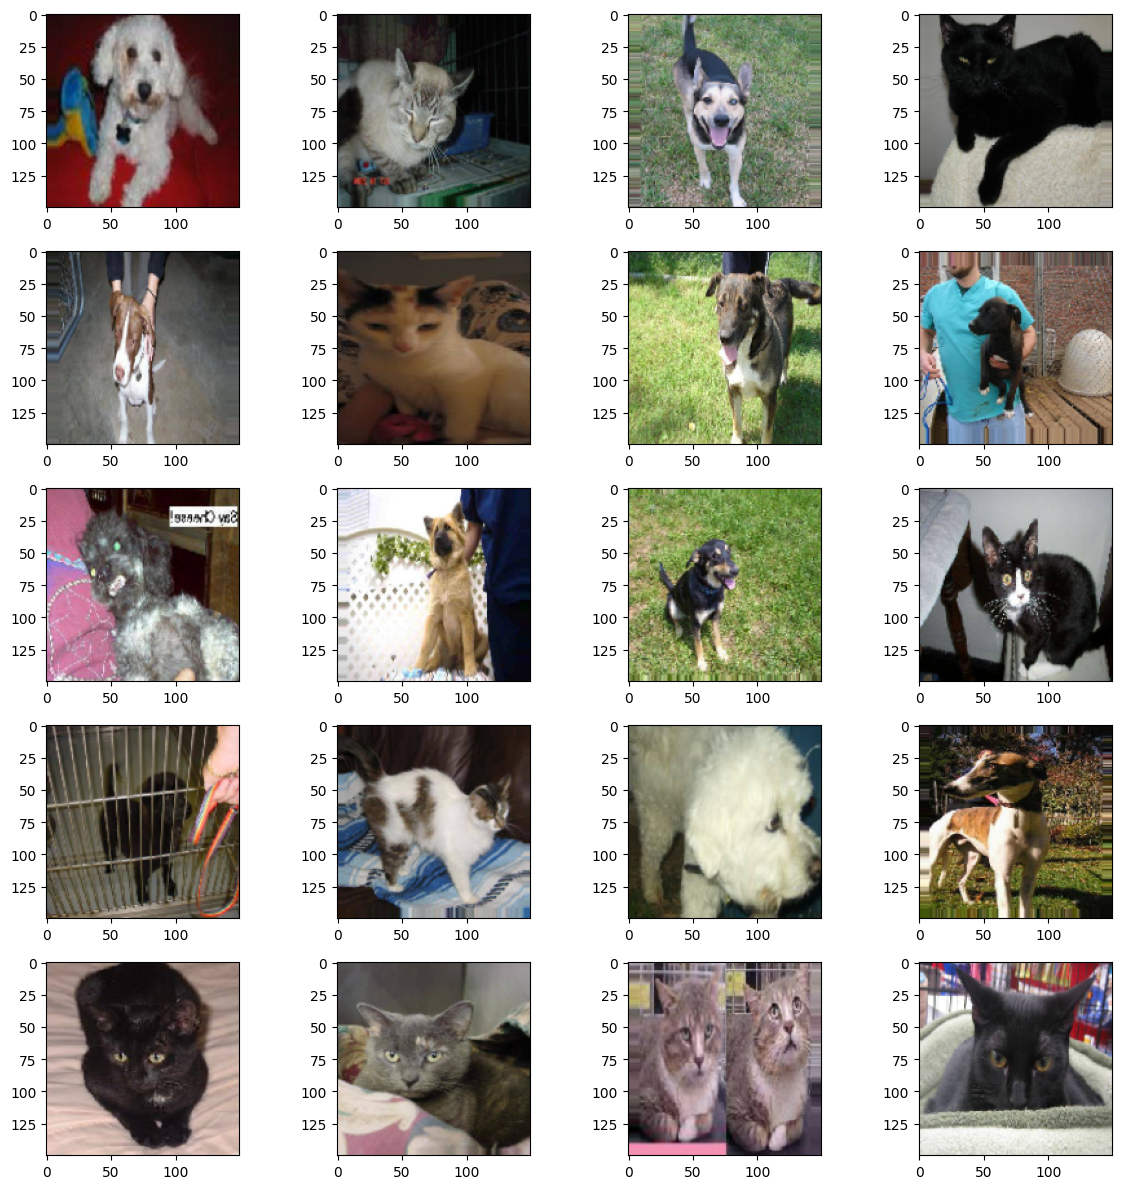

In [19]:
# Visual representation of Image_Data_Generator

plt.figure(figsize=(12,12))
for i in range(0,20):
  plt.subplot(5,4,i+1)
  for X_batch, Y_batch in train_generator:
    image =X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()


In [20]:
# CNN

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=input_shape))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=None))

model.add(Flatten())

model.add(Dense(64))

model.add(Activation('relu'))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [21]:
# Compile the basic CNN model

model.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [22]:
# Fit the basic CNN Model

tarining = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample, epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples)


<ipython-input-22-5ace4b89ccd9>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  tarining = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample, epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 35s 252ms/step - loss: 0.0000e+00 - accuracy: 0.5005 - val_loss: 0.0000e+00 - val_accuracy: 0.4995
Epoch 2/20
100/100 [==============================] - 22s 216ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.4990
Epoch 3/20
100/100 [==============================] - 26s 258ms/step - loss: 0.0000e+00 - accuracy: 0.4975 - val_loss: 0.0000e+00 - val_accuracy: 0.4980
Epoch 4/20
100/100 [==============================] - 20s 199ms/step - loss: 0.0000e+00 - accuracy: 0.5108 - val_loss: 0.0000e+00 - val_accuracy: 0.5005
Epoch 5/20
100/100 [==============================] - 25s 251ms/step - loss: 0.0000e+00 - accuracy: 0.4960 - val_loss: 0.0000e+00 - val_accuracy: 0.4985
Epoch 6/20
100/100 [==============================] - 21s 208ms/step - loss: 0.0000e+00 - accuracy: 0.4982 - val_loss: 0.0000e+00 - val_accuracy: 0.4995
Epoch 7/20
100/100 [==============================] - 25s 248ms/step - loss: 0.0000e+00 - acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


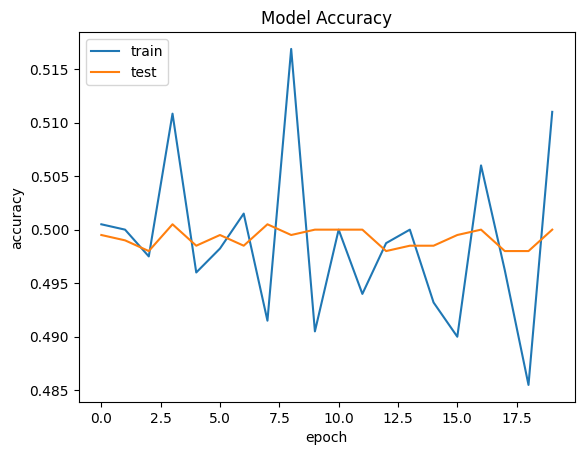

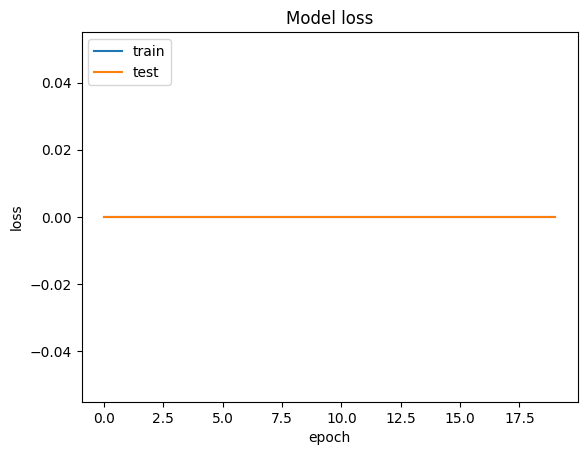

In [23]:
import matplotlib.pyplot as plt

# list all data in tarining
print(tarining.history.keys())

# Accuracy

plt.plot(tarining.history['accuracy'])
plt.plot(tarining.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

plt.show()

# Loss

plt.plot(tarining.history['loss'])
plt.plot(tarining.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

plt.show()



In [25]:
# Predict the image

from tensorflow.keras.preprocessing import image
import numpy as np


1/1 [==============================] - 0s 20ms/step
[[0.]]
Prediction=  Dog


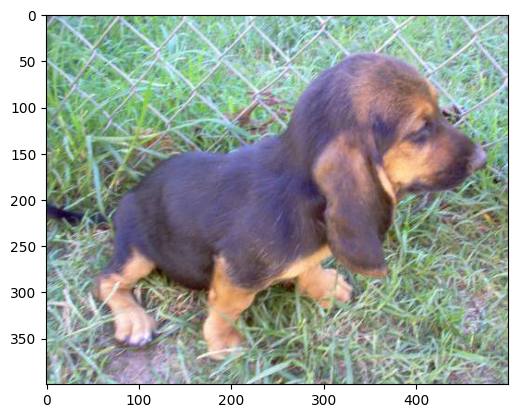

In [27]:
img_pred= image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg", target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)

if rslt[0][0]==1:
  prediction="Cat"
else:
  prediction="Dog"
print("Prediction= ", prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4009.jpg')
imgplot = plt.imshow(img)
plt.show()